# Cavity visualization with NGL Viewer

This Jupyter notebook presents how to visualize a cavity detection and characterization on a catalytic subunit of a cAMP-dependent protein kinase (PDB ID: 1FMO) with NGL Viewer package.

# Requirements

In [1]:
# Import NGL Viewer
import os
import zipfile
import nglview
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Unzip required files
if not os.path.isdir('./data'):
    with zipfile.ZipFile('./data.zip', 'r') as zipped:
        zipped.extractall('./data')

# To reproduce this files, run:
# pyKVFinder ./data/1FMO.pdb --hydropathy --depth -O ./data/

# Fill this information with your own data
results_file = './data/1FMO.KVFinder.results.toml'
pdb = './data/1FMO.pdb'
cavities = './data/1FMO.KVFinder.output.pdb'

In [3]:
# To install toml package, run:
# pip install toml

# Import toml
import toml 

# Load KVFinder results
results = toml.load(results_file)

# Visualization of cavity and surface points

In [4]:
# Define function to rotate object
def rotate_view(view, x=0, y=0, z=0, degrees=True):
    radians = 1
    if degrees: radians = 3.1416 / 180
    view.control.spin([1, 0, 0], x*radians)
    view.control.spin([0, 1, 0], y*radians)
    view.control.spin([0, 0, 1], z*radians)

In [5]:
# Visualize cavity (blue) and surface (red) points 

# Create NGL Viewer widget
view = nglview.NGLWidget()

# Add protein
p1 = view.add_component(pdb)
p1.clear()
p1.add_cartoon(color='grey')
# Uncomment to add transparency to cartoon representation and comment the line above
# p1.add_cartoon(color='grey', opacity=0.5) 

# Add cavities
p2 = view.add_component(cavities)
p2.clear()
p2.add_point(selection='.HA', color='red')
p2.add_point(selection='.H', color='blue')

# Show volume and area
print('Volume: ', end='')
print(results['RESULTS']['VOLUME'])
print('Area: ', end='')
print(results['RESULTS']['AREA'])

# Show
view

Volume: {'KAA': 137.16, 'KAB': 47.52, 'KAC': 66.96, 'KAD': 8.21, 'KAE': 43.63, 'KAF': 12.53, 'KAG': 6.26, 'KAH': 520.13, 'KAI': 12.31, 'KAJ': 26.57, 'KAK': 12.31, 'KAL': 33.91, 'KAM': 23.11, 'KAN': 102.82, 'KAO': 6.05, 'KAP': 15.55, 'KAQ': 7.99, 'KAR': 7.78}
Area: {'KAA': 117.06, 'KAB': 56.88, 'KAC': 69.52, 'KAD': 18.76, 'KAE': 52.77, 'KAF': 20.99, 'KAG': 14.49, 'KAH': 460.03, 'KAI': 29.54, 'KAJ': 41.19, 'KAK': 29.54, 'KAL': 41.87, 'KAM': 41.1, 'KAN': 120.58, 'KAO': 11.69, 'KAP': 23.71, 'KAQ': 11.38, 'KAR': 15.56}


NGLWidget()

In [6]:
# Change camera
view.camera = 'orthographic'

# Rotate
rotate_view(view, 210, 0, 90)

# Save Image
view.download_image(
    'cavities.png',
    factor=10,
    trim=True,
    transparent=True
)

# Visualization of interface residues surrounding a target cavity

In [7]:
# Visualize interface residues (red licorice)

# Define the tag of the cavity you want to see 
tag = 'KAH'

# Create NGL Viewer widget
view = nglview.NGLWidget()

# Add protein
p1 = view.add_component(pdb)
p1.clear()
p1.add_cartoon(color='grey')
# Uncomment to add transparency to cartoon representation and comment the line above
# p1.add_cartoon(color='grey', opacity=0.5)

# Select interface residues
selection = f"{' or '.join([f'({sel[0]} and :{sel[1]})' for sel in results['RESULTS']['RESIDUES'][tag]])}"

# Add interface residues
p1.add_licorice(color='red', selection=selection)

# Add cavities
p2 = view.add_component(cavities)
p2.clear()
p2.add_surface(selection='KAH', color='white', opacity=0.5, surfaceType='vws', probeRadius=0.3)

# Show list of interface residues
print('Interface residues: ', end='')
print(results['RESULTS']['RESIDUES'][tag])

# Show
view

Interface residues: [['49', 'E', 'LEU'], ['50', 'E', 'GLY'], ['51', 'E', 'THR'], ['52', 'E', 'GLY'], ['53', 'E', 'SER'], ['54', 'E', 'PHE'], ['55', 'E', 'GLY'], ['56', 'E', 'ARG'], ['57', 'E', 'VAL'], ['70', 'E', 'ALA'], ['72', 'E', 'LYS'], ['74', 'E', 'LEU'], ['84', 'E', 'GLN'], ['87', 'E', 'HIS'], ['88', 'E', 'THR'], ['91', 'E', 'GLU'], ['104', 'E', 'VAL'], ['120', 'E', 'MET'], ['121', 'E', 'GLU'], ['122', 'E', 'TYR'], ['123', 'E', 'VAL'], ['127', 'E', 'GLU'], ['166', 'E', 'ASP'], ['168', 'E', 'LYS'], ['170', 'E', 'GLU'], ['171', 'E', 'ASN'], ['173', 'E', 'LEU'], ['183', 'E', 'THR'], ['184', 'E', 'ASP'], ['186', 'E', 'GLY'], ['187', 'E', 'PHE'], ['201', 'E', 'THR'], ['327', 'E', 'PHE']]


NGLWidget()

In [8]:
# Change camera
view.camera = 'orthographic'

# Rotate
rotate_view(view, 210, 0, 90)

# Save Image
view.download_image(
    'interface-residues.png',
    factor=10,
    trim=True,
    transparent=True
)

# Visualization of depth mapped on cavities

In [9]:
# Visualize depth of cavity points (rainbow scale)

# Create NGL Viewer widget
view = nglview.NGLWidget()

# Check if depth characterization was performed
if ('MAX_DEPTH' and 'AVG_DEPTH') in results['RESULTS'].keys():
    # Add protein
    p1 = view.add_component(pdb)
    p1.clear()
    p1.add_cartoon(color='grey')
    # Uncomment to add transparency to cartoon representation and comment the line above
    # p1.add_cartoon(color='grey', opacity=0.5)

    # Add depth cavities
    p3 = view.add_component(cavities)
    p3.clear()
    p3.add_surface(colorScheme='bfactor', colorScale='rainbow', colorReverse=True, surfaceType='vws', probeRadius=0.3)
    # Uncomment to visualize cavities as points instead of surface and comment the line above
    # p3.add_point(colorScheme='bfactor',colorScale='rainbow')

    # Show maximum and average depth
    print('Maximum depth: ', end='')
    print(results['RESULTS']['MAX_DEPTH'])
    print('Average depth: ', end='')
    print(results['RESULTS']['AVG_DEPTH'])

# Show
view

Maximum depth: {'KAA': 3.79, 'KAB': 2.68, 'KAC': 2.62, 'KAD': 0.85, 'KAE': 3.0, 'KAF': 0.85, 'KAG': 0.6, 'KAH': 10.73, 'KAI': 0.0, 'KAJ': 2.24, 'KAK': 0.0, 'KAL': 3.0, 'KAM': 1.2, 'KAN': 0.0, 'KAO': 1.04, 'KAP': 2.08, 'KAQ': 0.85, 'KAR': 0.6}
Average depth: {'KAA': 1.35, 'KAB': 0.91, 'KAC': 0.68, 'KAD': 0.32, 'KAE': 0.99, 'KAF': 0.24, 'KAG': 0.1, 'KAH': 3.91, 'KAI': 0.0, 'KAJ': 0.96, 'KAK': 0.0, 'KAL': 1.07, 'KAM': 0.24, 'KAN': 0.0, 'KAO': 0.29, 'KAP': 0.7, 'KAQ': 0.22, 'KAR': 0.12}


NGLWidget()

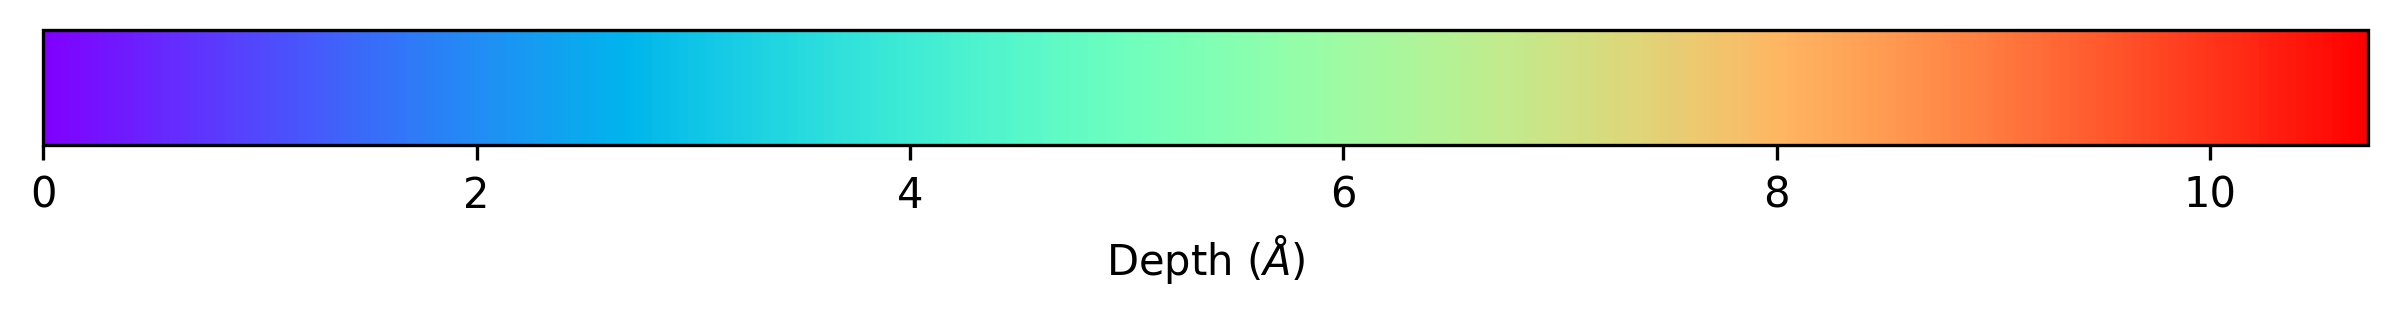

In [10]:
# Plot depth scale
fig, ax = plt.subplots(figsize=(10, 0.5), dpi=300)
norm = mpl.colors.Normalize(vmin=0, vmax=max(results['RESULTS']['MAX_DEPTH'].values()))
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('rainbow'), norm=norm, orientation='horizontal')
cb1.set_label(r'Depth ($\AA$)')

In [11]:
# Change camera
view.camera = 'orthographic'

# Rotate
rotate_view(view, 210, 0, 90)

# Save Image
view.download_image(
    'depth.png',
    factor=10,
    trim=True,
    transparent=True
)

# Visualization of hydropathy mapped on surface points

In [12]:
# Visualize hydropathy of cavity points (yellow-white-blue scale)

# Create NGL Viewer widget
view = nglview.NGLWidget()

# Check if hydropathy characterization was performed
if ('AVG_HYDROPATHY') in results['RESULTS'].keys():
    # Add protein
    p1 = view.add_component(pdb)
    p1.clear()
    p1.add_cartoon(color='grey')
    # Uncomment to add transparency to cartoon representation and comment the line above
    # p1.add_cartoon(color='grey', opacity=0.5)

    # Add hydrophobicity scale cavities
    p4 = view.add_component(cavities)
    p4.clear()
    p4.add_surface(selection='.HA', colorScheme='occupancy', colorMode='rgb', colorScale=[0xFFFF00, 0xffffff, 0x0000FF], surfaceType='vws', probeRadius=0.3)
    # Uncomment to visualize cavities as points instead of surface and comment the line above
    # p4.add_point(selection='.HA', colorScheme='occupancy', colorMode='rgb', colorScale=[0xFFFF00, 0xffffff, 0x0000FF])

    # Show average hydropathy
    print('Average hydropathy: ', end='')
    print(results['RESULTS']['AVG_HYDROPATHY'])

# Show
view

Average hydropathy: {'KAA': -0.65, 'KAB': -0.05, 'KAC': -0.12, 'KAD': -0.58, 'KAE': -0.67, 'KAF': -0.08, 'KAG': -0.52, 'KAH': -0.17, 'KAI': -0.5, 'KAJ': 0.99, 'KAK': -0.95, 'KAL': 0.35, 'KAM': -0.13, 'KAN': 0.03, 'KAO': 0.89, 'KAP': -0.82, 'KAQ': 0.49, 'KAR': 0.44, 'EisenbergWeiss': [-1.42, 2.6]}


NGLWidget()

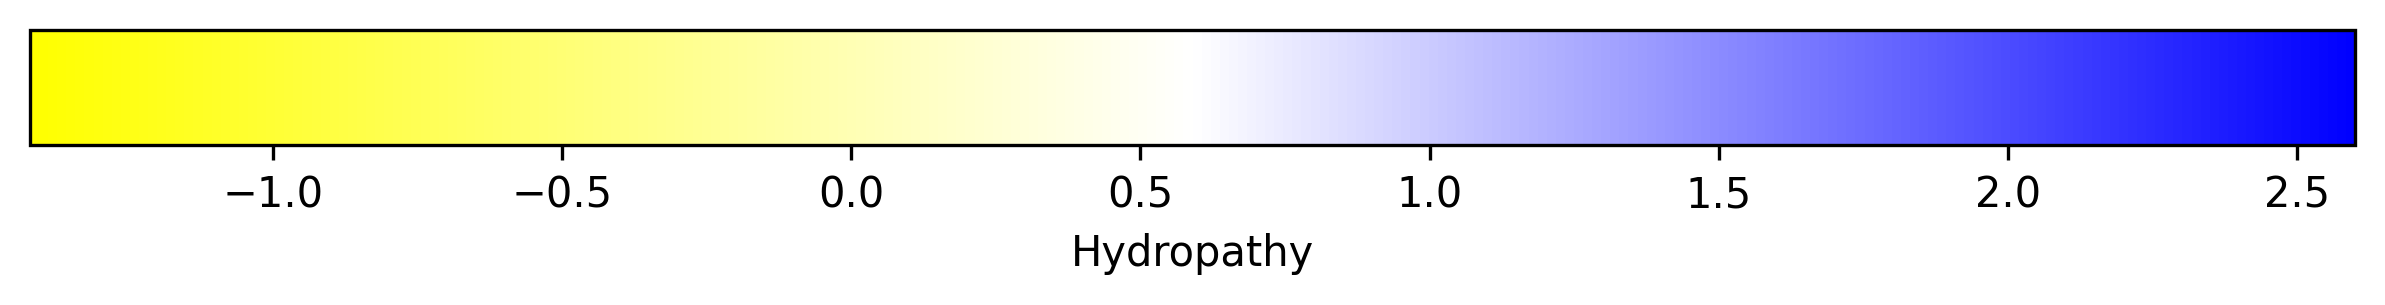

In [13]:
# Plot hydropathy scale
fig, ax = plt.subplots(figsize=(10, 0.5), dpi=300)
norm = mpl.colors.Normalize(vmin=results['RESULTS']['AVG_HYDROPATHY']['EisenbergWeiss'][0], vmax=results['RESULTS']['AVG_HYDROPATHY']['EisenbergWeiss'][1])
cm = mpl.colors.LinearSegmentedColormap.from_list('hydropathy', colors=["#FFFF00", "#ffffff", "#0000FF"])
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cm, norm=norm, orientation='horizontal')
cb1.set_label('Hydropathy')

In [14]:
# Change camera
view.camera = 'orthographic'

# Rotate
rotate_view(view, 210, 0, 90)

# Save Image
view.download_image(
    'hydropathy.png',
    factor=10,
    trim=True,
    transparent=True
)